|<h2>Course:</h2>|<h1><b><a href="https://udemy.com/course/dullms_x/?couponCode=202508" target="_blank">A deep understanding of AI language model mechanisms</a></b></h1>|
|-|:-:|
|<h2>Part 5:</h2>|<h1><b>Observation (non-causal) mech interp<b><h1>|
|<h2>Section:</h2>|<h1><b>Identifing latent factors<b><h1>|
|<h2>Lecture:</h2>|<h1><b>Generalized eigendecomposition code demo<b></h1>|

<br>

<h5><b>Teacher:</b> Mike X Cohen, <a href="https://sincxpress.com" target="_blank">sincxpress.com</a></h5>
<h5><b>Course URL:</b> <a href="https://udemy.com/course/dullms_x/?couponCode=202508" target="_blank">udemy.com/course/dullms_x/?couponCode=202508</a></h5>
<i>Using the code without the course may lead to confusion or errors.</i>

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# NOTE: numpy does not solve the GED, so we use scipy
import scipy.linalg

# Generate some data

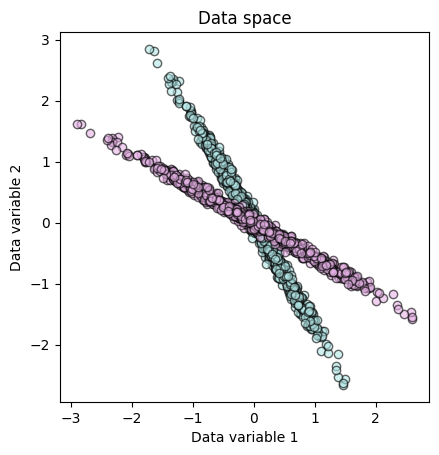

In [16]:
sampleSize = 1000

# generate data
x = np.stack((np.random.randn(sampleSize),.05*np.random.randn(sampleSize)),axis=0)

# rotation matrix
th = -np.pi/6
R1 = np.array([ [np.cos(th), -np.sin(th)], [np.sin(th), np.cos(th)] ])
th = -np.pi/3
R2 = np.array([ [np.cos(th), -np.sin(th)], [np.sin(th), np.cos(th)] ])

# rotate data
y = np.hstack( (R1@x,R2@x) )


# show the data
plt.plot(y[0,sampleSize:],y[1,sampleSize:],'ko',markerfacecolor=[.7,.9,.9],alpha=.6)
plt.plot(y[0,:sampleSize],y[1,:sampleSize],'ko',markerfacecolor=[.9,.7,.9],alpha=.6)
plt.axis('square')

plt.gca().set(xlabel='Data variable 1',ylabel='Data variable 2',title='Data space')
plt.show()

# Try a PCA

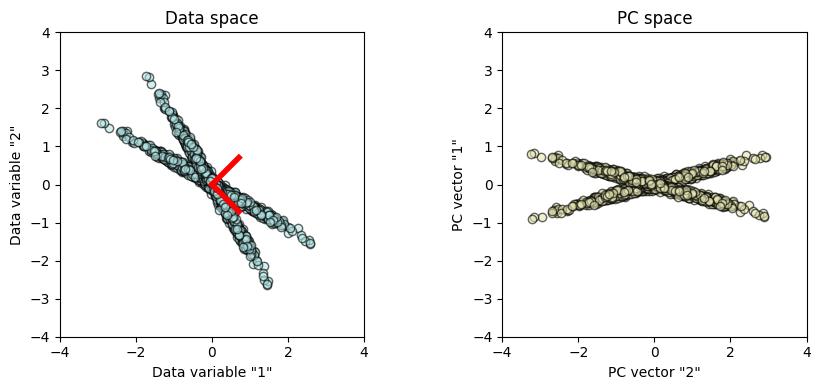

In [18]:
## run PCA

# mean-center
y -= np.mean(y,axis=1,keepdims=True)

# eigendecomposition of covariance matrix
evalsPCA,evecsPCA = np.linalg.eig( y@y.T / (len(y)-1) )

# component projection
comps = evecsPCA.T @ y


# plot the data with eigenvectors
_,axs = plt.subplots(1,2,figsize=(9,4))
axs[0].plot(y[0,:],y[1,:],'ko',markerfacecolor=[.7,.9,.9],alpha=.6)
axs[0].plot([0,evecsPCA[0,0]],[0,evecsPCA[1,0]],'r',linewidth=4)
axs[0].plot([0,evecsPCA[0,1]],[0,evecsPCA[1,1]],'r',linewidth=4)
axs[0].axis('square')
axs[0].set(xlim=[-4,4],ylim=[-4,4],xlabel='Data variable "1"',ylabel='Data variable "2"',title='Data space')


## plot the data in PC space
axs[1].plot(comps[0,:],comps[1,:],'ko',markerfacecolor=[.9,.9,.7],alpha=.6)
axs[1].axis('square')
axs[1].set(xlim=[-4,4],ylim=[-4,4],xlabel='PC vector "2"',ylabel='PC vector "1"',title='PC space')

plt.tight_layout()
plt.show()

In [19]:
y.shape,comps.shape

((2, 2000), (2, 2000))

# Generalized eigendecomposition

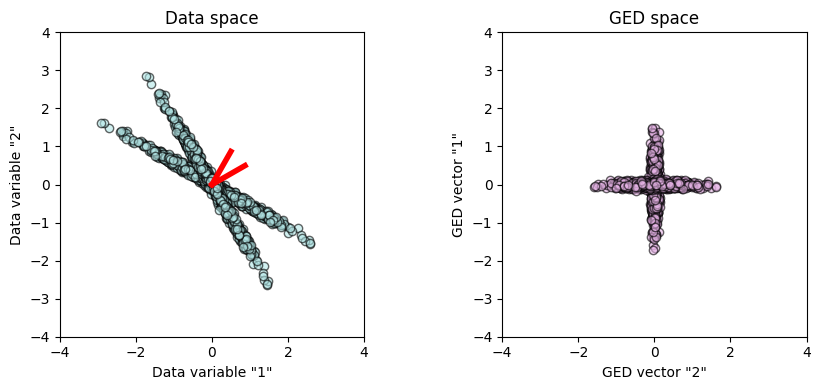

In [20]:
# covariance matrices (np.cov instead of manual)
S = np.cov(y[:,:sampleSize])
R = np.cov(y[:,sampleSize:])

# GED with optional scaling
### try without the normalization!
evalsGED,evecsGED = scipy.linalg.eigh(S,R) # Hermitian
evecsGED /= np.sqrt(np.sum(evecsGED**2,axis=0))

# projections onto GED axes
comps = evecsGED @ y


# plot the data with eigenvectors
_,axs = plt.subplots(1,2,figsize=(9,4))
axs[0].plot(y[0,:],y[1,:],'ko',markerfacecolor=[.7,.9,.9],alpha=.6)
axs[0].plot([0,evecsGED[0,0]],[0,evecsGED[1,0]],'r',linewidth=4)
axs[0].plot([0,evecsGED[0,1]],[0,evecsGED[1,1]],'r',linewidth=4)
axs[0].axis('square')
axs[0].set(xlim=[-4,4],ylim=[-4,4],xlabel='Data variable "1"',ylabel='Data variable "2"',title='Data space')


## plot the data in PC space
axs[1].plot(comps[0,:],comps[1,:],'ko',markerfacecolor=[.9,.7,.9],alpha=.6)
axs[1].axis('square')
axs[1].set(xlim=[-4,4],ylim=[-4,4],xlabel='GED vector "2"',ylabel='GED vector "1"',title='GED space')

plt.tight_layout()
plt.show()

(array([[ 0.26788591, -0.45934151],
        [-0.45934151,  0.79742021]]),
 array([[ 0.53000539, -0.00459342],
        [-0.00459342,  0.53530073]]))

# Shrinkage regularization

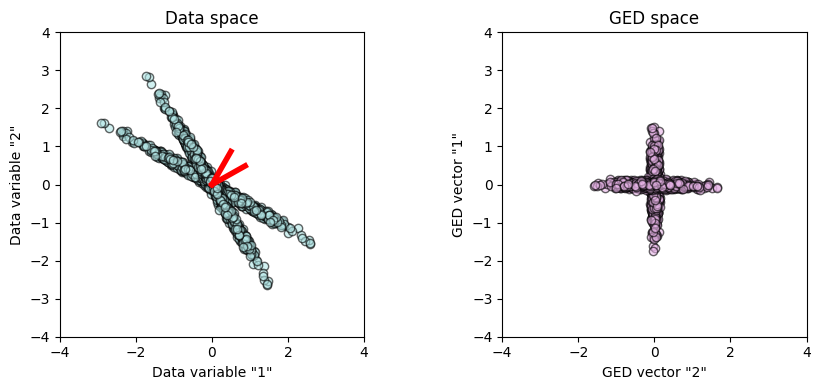

In [29]:
# regularization parameter
gamma = .01
Rregu = (1-gamma)*R + gamma*np.mean(np.linalg.eig(R)[0])*np.eye(2)

# GED with optional scaling
evalsGED,evecsGED = scipy.linalg.eigh(S,Rregu)
evecsGED /= np.sqrt(np.sum(evecsGED**2,axis=0))

# projections onto GED axes
comps = evecsGED @ y


# plot the data with eigenvectors
_,axs = plt.subplots(1,2,figsize=(9,4))
axs[0].plot(y[0,:],y[1,:],'ko',markerfacecolor=[.7,.9,.9,.6])
axs[0].plot([0,evecsGED[0,0]],[0,evecsGED[1,0]],'r',linewidth=4)
axs[0].plot([0,evecsGED[0,1]],[0,evecsGED[1,1]],'r',linewidth=4)
axs[0].axis('square')
axs[0].set(xlim=[-4,4],ylim=[-4,4],xlabel='Data variable "1"',ylabel='Data variable "2"',title='Data space')


## plot the data in PC space
axs[1].plot(comps[0,:],comps[1,:],'ko',markerfacecolor=[.9,.7,.9,.6])
axs[1].axis('square')
axs[1].set(xlim=[-4,4],ylim=[-4,4],xlabel='GED vector "2"',ylabel='GED vector "1"',title='GED space')

plt.tight_layout()
plt.show()